In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import ast
from sktime.transformations.series.sax import SAX
from prefixspan import PrefixSpan
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler
from tslearn.piecewise import SymbolicAggregateApproximation
from pyts.approximation import paa as paa

In [363]:
def load_npy(filename):
    return np.load(filename)


dir_path = 'cleaned_time_series/'
len_threshold = 1280
X, y, ids = [], [], []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    ids.append(split[0])  # track_id
    y.append(split[1][:-4])  # genre
    ts = load_npy(dir_path + file)

    if len(ts) > len_threshold:
        ts = ts[0:len_threshold]
    else:
        # pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        pad = [ts[-1]] * (len_threshold - len(ts))  # fill with last observation
        ts = np.append(ts, pad)

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids)
print(len(X))

10000


In [25]:
X.shape

(10000, 1, 1280)

In [31]:
# Initialize PAA transformer
approximator = paa.PiecewiseAggregateApproximation(window_size=30)

# Apply PAA to your time series data
X_paa = approximator.transform(X.reshape(-1, 1280))

print(X_paa.shape)

(10000, 43)


In [32]:
# subset of PAA with only happy genre
X_paa_happy = X_paa[y == 'happy']

In [33]:
X_paa_happy.shape

(500, 43)

# SAX transformation

## First step - Normalization

In [ ]:
X_paa_happy.shape

In [ ]:
X_paa_happy = X_paa_happy.reshape(X_paa_happy.shape[0], 1, X_paa_happy.shape[1])

X_paa_happy.shape

In [ ]:
# Import tabular to series adaptor and standard scaler
scaler = TabularToSeriesAdaptor(StandardScaler(), fit_in_transform=True)
X_happy = scaler.fit_transform(X_paa_happy) #if 3D np.ndarray should be of shape (n_instances, n_variables, n_timepoints)

## Second step - Definition of Symbolic Aggregate Approximation (SAX) parameters

In [ ]:
n_segments = 32  # Number of segments (number of segments equals 128 means that each segment will represent 10 original time points)
n_symbols = 10    # Number of symbols; also adjustable
sax = SymbolicAggregateApproximation(n_segments=n_segments, alphabet_size_avg=n_symbols)

## Third step - Apply SAX transformation

In [3]:
X_happy = X_happy.reshape(-1, 320, 1)

NameError: name 'X_happy' is not defined

In [4]:
# Apply SAX transformation
X_sax = sax.fit_transform(X_happy)

# Inverse transform to get the symbols
symbols = sax.inverse_transform(X_sax)

NameError: name 'sax' is not defined

## Fourth step - PrefixSpan algorithm to find frequent patterns

In [ ]:
symbols_str = np.array([', '.join(map(str, s.flatten())) for s in symbols])

In [2]:
#subselect first 10 elements of symbols_str
example = symbols_str[:3]
example = example.tolist()

example_list = [ast.literal_eval('[' + s + ']') for s in example]

lst = [[0, 1, 2, 3, 4],
       [1, 1, 1, 3, 4],
       [2, 1, 2, 2, 0],
       [1, 1, 1, 2, 2]]

NameError: name 'symbols_str' is not defined

In [1]:
lst

NameError: name 'lst' is not defined

In [ ]:
example

In [ ]:
example_list

In [ ]:
%%time
ps = PrefixSpan(example_list)
frequent_patterns = ps.frequent(1)  # With a minimum support of 10

In [ ]:
X_sax.shape

In [ ]:
symbols[3].tolist()

In [ ]:
frequent_patterns

# SAX in another way (The one of the professor)

In [353]:
sax = SAX(word_size=512, alphabet_size=10)

In [354]:
x_happy = X[y == 'happy']

In [355]:
x_happy.shape

(500, 1, 1280)

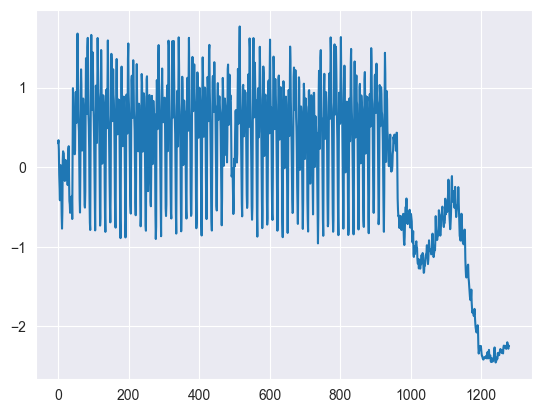

In [356]:
# plot first ts in x_happy
plt.plot(x_happy[0,-1].T)
plt.show()

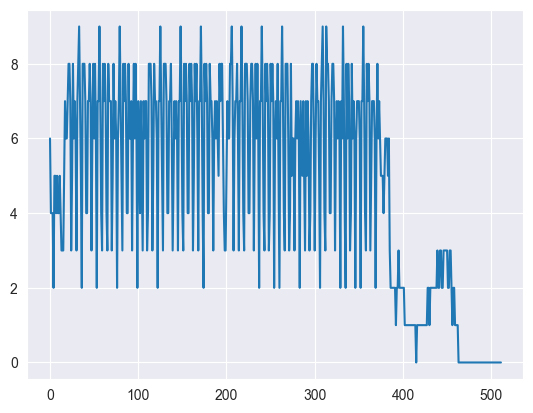

In [357]:
# apply SAX to first ts in x_happy
happy_transformed = sax.fit_transform(x_happy[0,-1].T)

# plot first ts in happy_transformed
plt.plot(happy_transformed)
plt.show()

In [351]:
happy_transformed = sax.fit_transform(x_happy)
happy_transformed.shape

(500, 1, 1280)

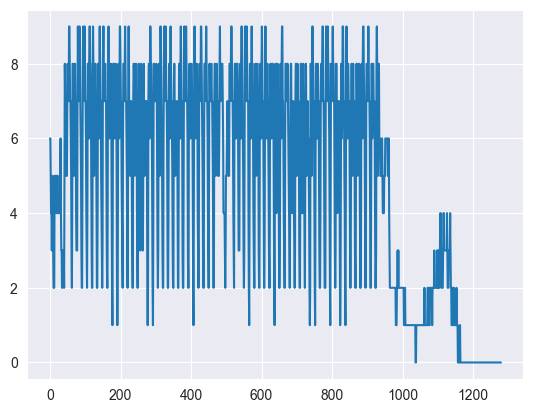

In [352]:
# plot first ts in happy_transformed
plt.plot(happy_transformed[0,-1].T)
plt.show()

In [326]:
# Transform happy_transformed to list of integers
happy_transformed_int = []

for i in range(happy_transformed.shape[0]):
    happy_transformed_int.append([int(element) for element in happy_transformed[i,-1].T])
    
happy_transformed_int

[[5,
  4,
  3,
  5,
  4,
  4,
  3,
  3,
  6,
  6,
  8,
  8,
  4,
  7,
  7,
  5,
  8,
  6,
  6,
  8,
  5,
  6,
  8,
  5,
  7,
  7,
  4,
  7,
  8,
  3,
  8,
  8,
  4,
  8,
  7,
  4,
  7,
  7,
  4,
  8,
  6,
  6,
  8,
  6,
  6,
  6,
  5,
  7,
  7,
  4,
  7,
  6,
  4,
  6,
  7,
  3,
  8,
  8,
  4,
  7,
  7,
  4,
  8,
  6,
  6,
  8,
  5,
  6,
  8,
  5,
  6,
  7,
  4,
  7,
  8,
  4,
  8,
  8,
  4,
  7,
  7,
  4,
  8,
  7,
  5,
  8,
  6,
  5,
  8,
  5,
  6,
  7,
  5,
  7,
  7,
  6,
  7,
  8,
  5,
  3,
  6,
  6,
  8,
  8,
  5,
  7,
  7,
  5,
  8,
  6,
  6,
  8,
  6,
  6,
  8,
  5,
  7,
  7,
  4,
  7,
  8,
  4,
  8,
  7,
  4,
  7,
  7,
  4,
  6,
  7,
  4,
  8,
  6,
  6,
  8,
  5,
  6,
  6,
  4,
  7,
  7,
  4,
  6,
  6,
  4,
  6,
  6,
  3,
  7,
  7,
  4,
  7,
  6,
  5,
  8,
  6,
  6,
  8,
  5,
  6,
  8,
  5,
  7,
  7,
  4,
  7,
  8,
  3,
  7,
  8,
  4,
  7,
  7,
  4,
  7,
  7,
  4,
  8,
  6,
  6,
  8,
  5,
  6,
  7,
  4,
  7,
  7,
  5,
  5,
  5,
  6,
  6,
  4,
  2,
  2,
  2,
  1,
  3,
  2,
  2,


In [327]:
# Create a subset of only 5 elements of happy_transformed_int
happy_transformed_int_subset = happy_transformed_int[:5]
type(happy_transformed_int_subset)

list

In [328]:
ps = PrefixSpan(happy_transformed_int)

In [160]:
%%time
frequent_patterns = ps.frequent(470, closed=True)

CPU times: user 2.53 s, sys: 2.65 ms, total: 2.53 s
Wall time: 2.6 s


In [161]:
frequent_patterns

[(497, [9]),
 (492, [9, 8]),
 (478, [9, 8, 9]),
 (475, [9, 8, 7]),
 (477, [9, 8, 12]),
 (480, [9, 8, 11]),
 (479, [9, 8, 10]),
 (471, [9, 8, 10, 11]),
 (478, [9, 8, 8]),
 (489, [9, 9]),
 (471, [9, 9, 7]),
 (478, [9, 9, 12]),
 (481, [9, 9, 11]),
 (470, [9, 9, 11, 11]),
 (482, [9, 9, 9]),
 (473, [9, 9, 9, 11]),
 (471, [9, 9, 9, 10]),
 (471, [9, 9, 9, 9]),
 (483, [9, 9, 10]),
 (474, [9, 9, 10, 11]),
 (473, [9, 9, 10, 10]),
 (470, [9, 9, 10, 8]),
 (475, [9, 9, 10, 9]),
 (480, [9, 9, 8]),
 (488, [9, 7]),
 (470, [9, 7, 12]),
 (474, [9, 7, 11]),
 (474, [9, 7, 9]),
 (471, [9, 7, 10]),
 (476, [9, 7, 7]),
 (477, [9, 7, 8]),
 (490, [9, 12]),
 (478, [9, 12, 12]),
 (470, [9, 12, 13]),
 (482, [9, 12, 11]),
 (470, [9, 12, 11, 10]),
 (474, [9, 12, 9]),
 (481, [9, 12, 10]),
 (477, [9, 12, 8]),
 (481, [9, 13]),
 (470, [9, 13, 12]),
 (471, [9, 13, 11]),
 (472, [9, 13, 10]),
 (489, [9, 11]),
 (479, [9, 11, 11]),
 (477, [9, 11, 12]),
 (480, [9, 11, 9]),
 (486, [9, 11, 10]),
 (470, [9, 11, 10, 8]),
 (472, [

## Looking for the longest most frequent pattern for each genre

In [329]:
topk = ps.topk(500)

In [333]:
topk

[(500, [5]),
 (500, [5, 3]),
 (500, [5, 3, 3]),
 (500, [5, 3, 3, 3]),
 (500, [5, 3, 6]),
 (500, [5, 4]),
 (500, [5, 4, 2]),
 (500, [5, 4, 2, 3]),
 (500, [5, 4, 3]),
 (500, [5, 4, 3, 3]),
 (500, [5, 4, 3, 3, 3]),
 (500, [5, 4, 3, 6]),
 (500, [5, 4, 4]),
 (500, [5, 4, 4, 2]),
 (500, [5, 4, 4, 2, 3]),
 (500, [5, 4, 4, 3]),
 (500, [5, 4, 4, 3, 3]),
 (500, [5, 4, 4, 3, 3, 3]),
 (500, [5, 4, 4, 4]),
 (500, [5, 4, 4, 4, 2]),
 (500, [5, 4, 4, 4, 2, 3]),
 (500, [5, 4, 4, 4, 3]),
 (500, [5, 4, 4, 4, 3, 3]),
 (500, [5, 4, 4, 4, 4]),
 (500, [5, 4, 4, 4, 4, 2]),
 (500, [5, 4, 4, 4, 4, 2, 3]),
 (500, [5, 4, 4, 4, 4, 3]),
 (500, [5, 4, 4, 4, 4, 3, 3]),
 (500, [5, 4, 6]),
 (500, [5, 4, 6, 2]),
 (500, [5, 4, 6, 4]),
 (500, [5, 4, 6, 4, 2]),
 (500, [5, 4, 6, 4, 4]),
 (500, [5, 4, 6, 4, 4, 2]),
 (500, [5, 4, 6, 4, 4, 4]),
 (500, [5, 4, 6, 6]),
 (500, [5, 4, 6, 6, 4]),
 (500, [5, 4, 6, 6, 4, 4]),
 (500, [5, 4, 6, 6, 4, 4, 4]),
 (500, [5, 4, 6, 6, 6]),
 (500, [5, 4, 6, 6, 6, 4]),
 (500, [5, 5]),
 (500, [5,

In [330]:
# Find the maximum length of any pattern
max_length = max(len(pattern[1]) for pattern in topk)

# Filter to keep only those patterns with the maximum length
longest_patterns = [pattern for pattern in topk if len(pattern[1]) == max_length]

# Sort the filtered list by support values in descending order to find the most frequent
longest_patterns_sorted = sorted(longest_patterns, key=lambda x: x[0], reverse=True)

# Print the most frequent longest pattern
if longest_patterns_sorted:
    most_frequent_longest_pattern = longest_patterns_sorted[0]
    print("Most frequent longest pattern:", most_frequent_longest_pattern)
else:
    print("No patterns found of maximum length.")


Most frequent longest pattern: (500, [5, 5, 5, 6, 4, 6, 6, 6, 4])


Plotting the most frequent longest pattern

In [331]:
# Example data structure (simplified)
# Let's assume happy_transformed is already filled with data after transformation
# For illustration, we'll simulate this with random data
# The pattern you're looking for, e.g., [9, 8, 11] converted to your SAX alphabet
pattern = [5, 5, 5, 6, 4, 6, 6, 6, 4]

# Function to find all start indices of a pattern in a series
def find_pattern_indices(series, pattern):
    pat_len = len(pattern)
    return [i for i in range(len(series) - pat_len + 1) if np.array_equal(series[i:i+pat_len], pattern)]

# Identify series that contain the pattern and collect their start indices
indices_per_series = {}
for i in range(happy_transformed.shape[0]):
    # Extract the series and remove the extra dimension
    series = happy_transformed[i, 0, :]
    indices = find_pattern_indices(series, pattern)
    if indices:
        indices_per_series[i] = indices
        if len(indices_per_series) == 1:  # Stop after finding 3 series with the pattern
            break

# Plotting the first 3 time series with the pattern highlighted
fig, axs = plt.subplots(len(indices_per_series), 1, figsize=(10, 5 * len(indices_per_series)), squeeze=False)
for ax, (ts_index, starts) in zip(axs.flatten(), indices_per_series.items()):
    series = happy_transformed[ts_index, 0, :]
    ax.plot(series, label=f'Time Series {ts_index}')
    for start in starts:
        ax.plot(range(start, start + len(pattern)), series[start:start + len(pattern)], color='green', linewidth=2, label='Pattern')
        ax.legend()

plt.tight_layout()
plt.show()


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1000x0 with 0 Axes>

# Trying to perform SAX and PrefixSpan on the whole dataset

In [ ]:
sax = SAX(word_size=128, alphabet_size=20)

In [203]:
total_transformed = sax.fit_transform(X)
total_transformed.shape

(10000, 1, 128)

In [205]:
# transform total_transformed to list of integers
total_transformed_int = []

for i in range(total_transformed.shape[0]):
    total_transformed_int.append([int(element) for element in total_transformed[i,-1].T])
    
len(total_transformed_int)

10000

In [206]:
ps = PrefixSpan(total_transformed_int)

In [ ]:
# con 50, 31 sec
# con 100, 1 minuto e 8 secondi
# con 200, 2 minuti e 9 secondi
# con 1000, 10 minuti e 10 secondi

In [229]:
topk = ps.topk(1000)

In [230]:
len(topk)

1000

In [231]:
topk

[(9989, [12]),
 (9986, [11]),
 (9983, [10]),
 (9980, [9]),
 (9970, [8]),
 (9967, [7]),
 (9965, [13]),
 (9952, [6]),
 (9942, [5]),
 (9942, [10, 10]),
 (9936, [11, 10]),
 (9931, [9, 8]),
 (9931, [10, 11]),
 (9931, [11, 11]),
 (9930, [11, 9]),
 (9925, [9, 10]),
 (9925, [10, 9]),
 (9924, [4]),
 (9923, [12, 9]),
 (9922, [9, 9]),
 (9922, [11, 8]),
 (9922, [12, 11]),
 (9921, [12, 10]),
 (9920, [10, 8]),
 (9920, [11, 12]),
 (9919, [10, 7]),
 (9916, [9, 7]),
 (9915, [14]),
 (9914, [8, 7]),
 (9913, [9, 11]),
 (9913, [9, 12]),
 (9913, [11, 7]),
 (9912, [10, 12]),
 (9910, [12, 8]),
 (9904, [8, 9]),
 (9904, [12, 12]),
 (9903, [7, 8]),
 (9903, [8, 8]),
 (9902, [8, 10]),
 (9901, [7, 7]),
 (9900, [9, 6]),
 (9895, [12, 7]),
 (9893, [7, 9]),
 (9892, [8, 11]),
 (9889, [10, 6]),
 (9887, [8, 6]),
 (9887, [11, 6]),
 (9887, [13, 11]),
 (9883, [7, 6]),
 (9881, [7, 10]),
 (9878, [13, 10]),
 (9877, [8, 5]),
 (9877, [8, 12]),
 (9876, [9, 5]),
 (9875, [13, 9]),
 (9873, [12, 6]),
 (9870, [6, 7]),
 (9869, [7, 11]),

## Looking for the longest most frequent pattern

In [232]:
# Find the maximum length of any pattern
max_length = max(len(pattern[1]) for pattern in topk)

# Filter to keep only those patterns with the maximum length
longest_patterns = [pattern for pattern in topk if len(pattern[1]) == max_length]

# Sort the filtered list by support values in descending order to find the most frequent
longest_patterns_sorted = sorted(longest_patterns, key=lambda x: x[0], reverse=True)

# Print the most frequent longest pattern
if longest_patterns_sorted:
    most_frequent_longest_pattern = longest_patterns_sorted[0]
    print("Most frequent longest pattern:", most_frequent_longest_pattern)
else:
    print("No patterns found of maximum length.")


Most frequent longest pattern: (9612, [10, 9, 9, 9])


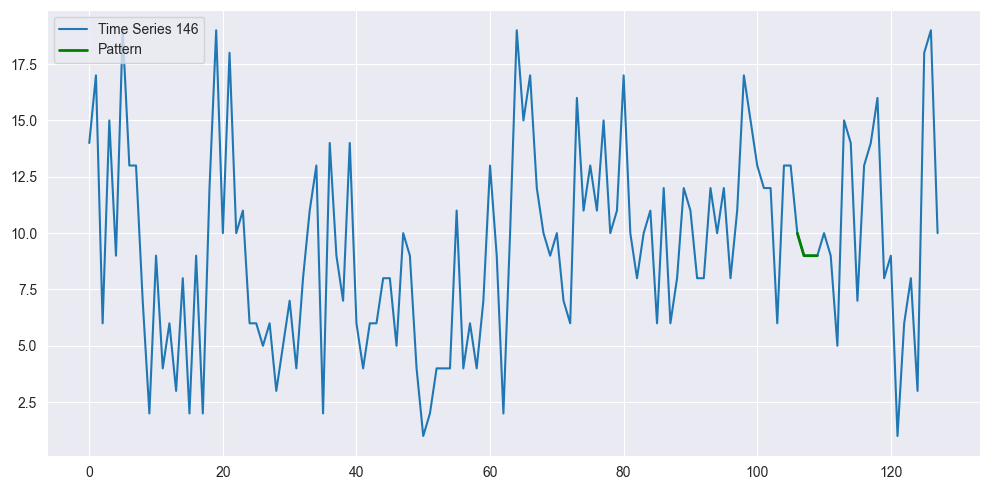

In [276]:
# Example data structure (simplified)
# Let's assume happy_transformed is already filled with data after transformation
# For illustration, we'll simulate this with random data
# The pattern you're looking for, e.g., [9, 8, 11] converted to your SAX alphabet

# Function to find all start indices of a pattern in a series
def find_pattern_indices(series, pattern):
    pat_len = len(pattern)
    return [i for i in range(len(series) - pat_len + 1) if np.array_equal(series[i:i+pat_len], pattern)]

# Identify series that contain the pattern and collect their start indices
indices_per_series = {}
for i in range(total_transformed.shape[0]):
    # Extract the series and remove the extra dimension
    series = total_transformed[i, 0, :]
    indices = find_pattern_indices(series, pattern)
    if indices:
        indices_per_series[i] = indices
        if len(indices_per_series) == 1:  # Stop after finding 3 series with the pattern
            break

# Plotting the first 3 time series with the pattern highlighted
fig, axs = plt.subplots(len(indices_per_series), 1, figsize=(10, 5 * len(indices_per_series)), squeeze=False)
for ax, (ts_index, starts) in zip(axs.flatten(), indices_per_series.items()):
    series = total_transformed[ts_index, 0, :]
    ax.plot(series, label=f'Time Series {ts_index}')
    for start in starts:
        ax.plot(range(start, start + len(pattern)), series[start:start + len(pattern)], color='green', linewidth=2, label='Pattern')
        ax.legend()

plt.tight_layout()
plt.show()


# Searching for the most frequent pattern for each genre

Processing genre: emo
Most frequent longest pattern for emo : (495, [11, 9, 9, 11])


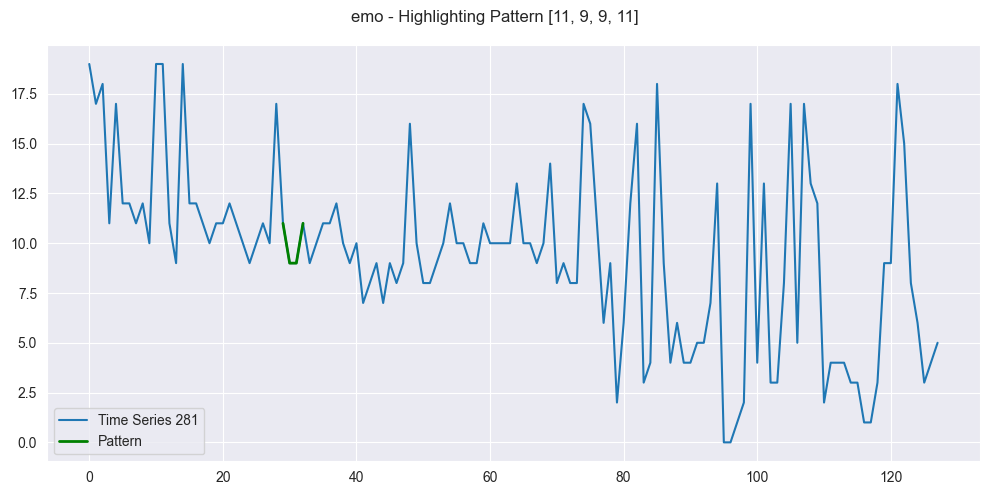

Processing genre: folk
Most frequent longest pattern for folk : (494, [7, 7, 8, 7])


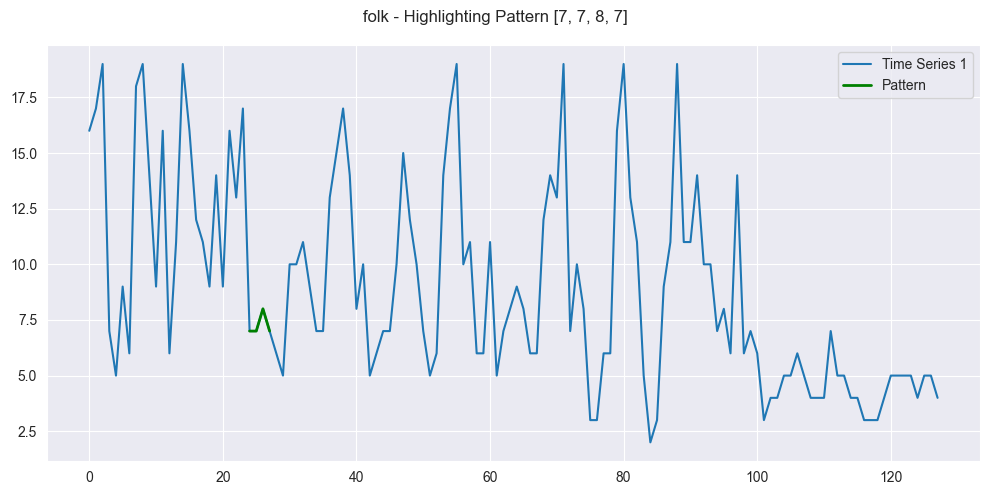

Processing genre: goth
Most frequent longest pattern for goth : (496, [10, 10, 9, 9])


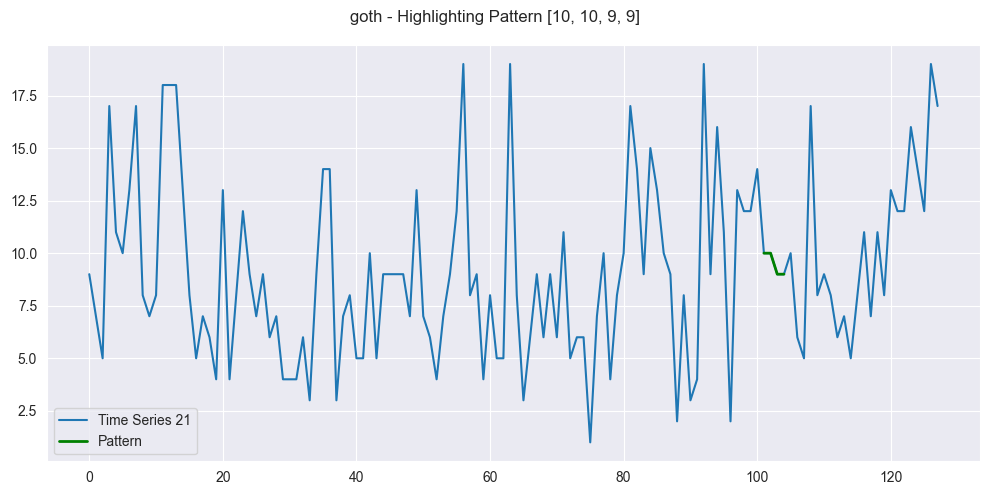

Processing genre: happy
Most frequent longest pattern for happy : (477, [9, 10, 10, 8])


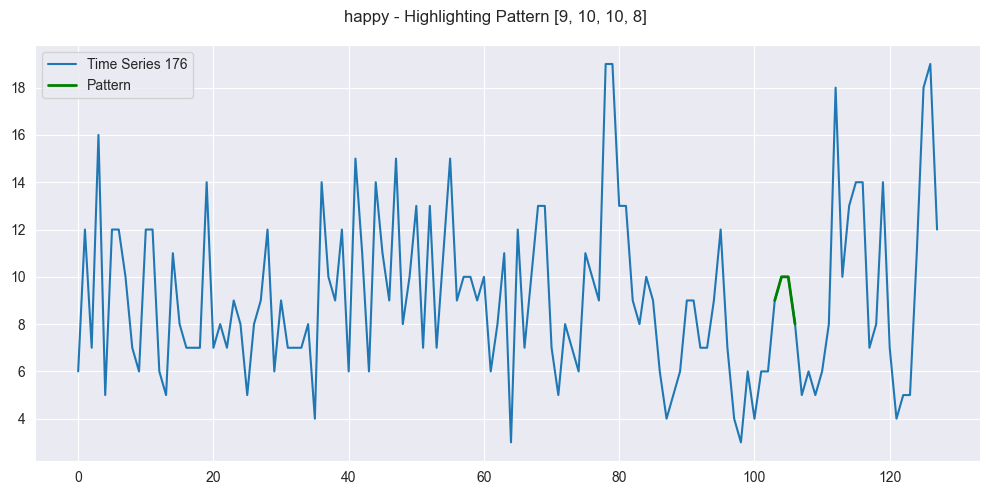

Processing genre: heavy-metal
Most frequent longest pattern for heavy-metal : (496, [8, 8, 9, 9])


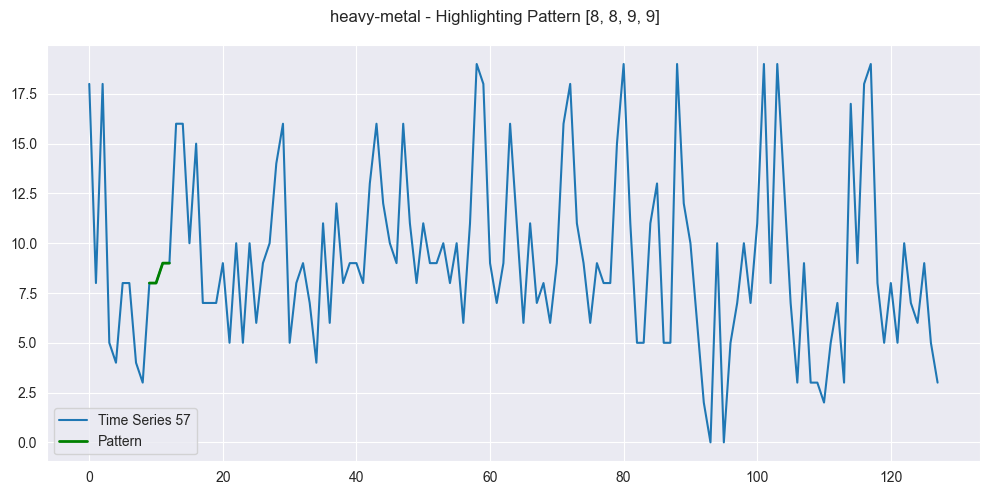

Processing genre: honky-tonk
Most frequent longest pattern for honky-tonk : (497, [7, 9, 7, 5])
No occurrences of the pattern [7, 9, 7, 5] found in any series for genre: honky-tonk
Processing genre: j-idol
Most frequent longest pattern for j-idol : (498, [10, 9, 9, 10])


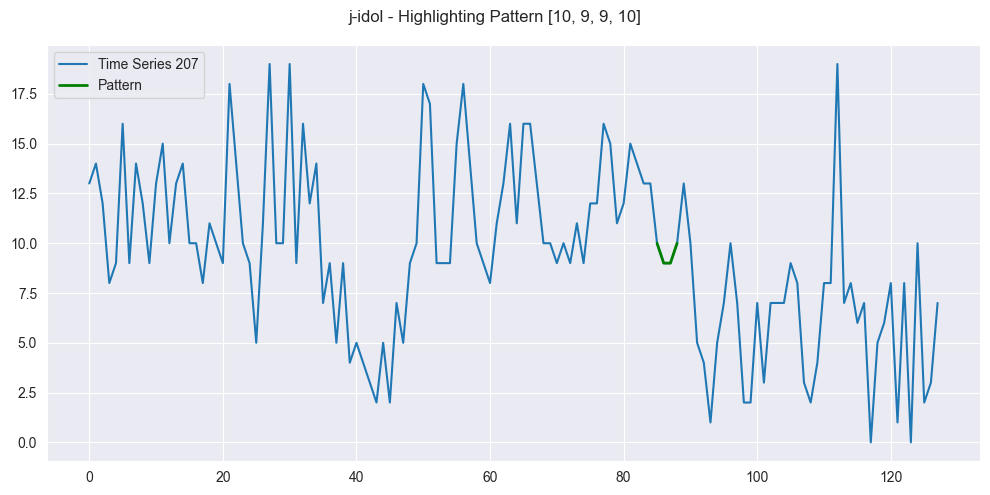

Processing genre: kids
Most frequent longest pattern for kids : (496, [8, 8, 7, 9])


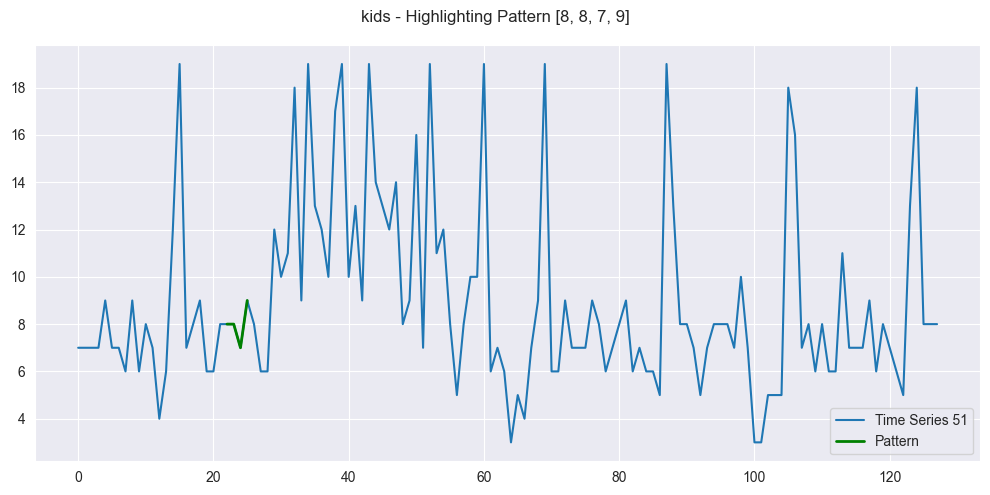

Processing genre: minimal-techno
Most frequent longest pattern for minimal-techno : (477, [10, 11, 10, 12])


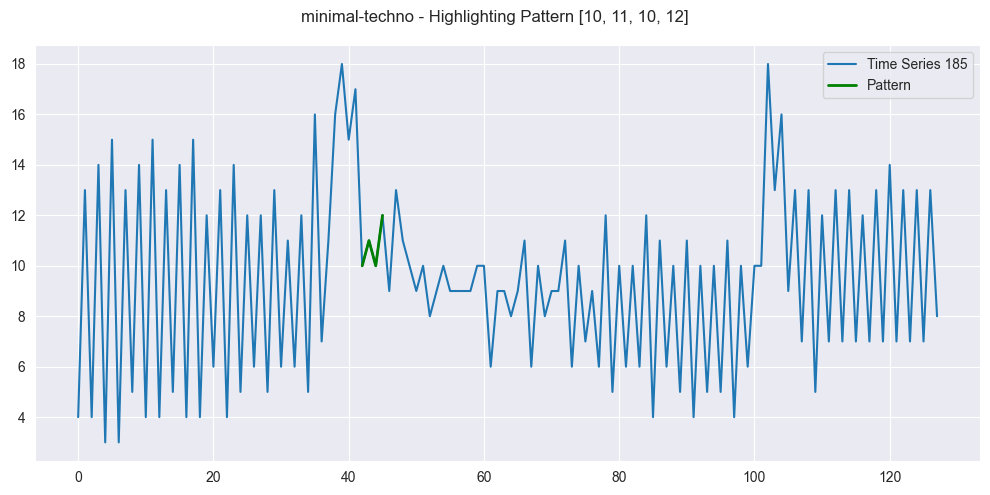

Processing genre: mpb
Most frequent longest pattern for mpb : (497, [5, 7, 8, 8])


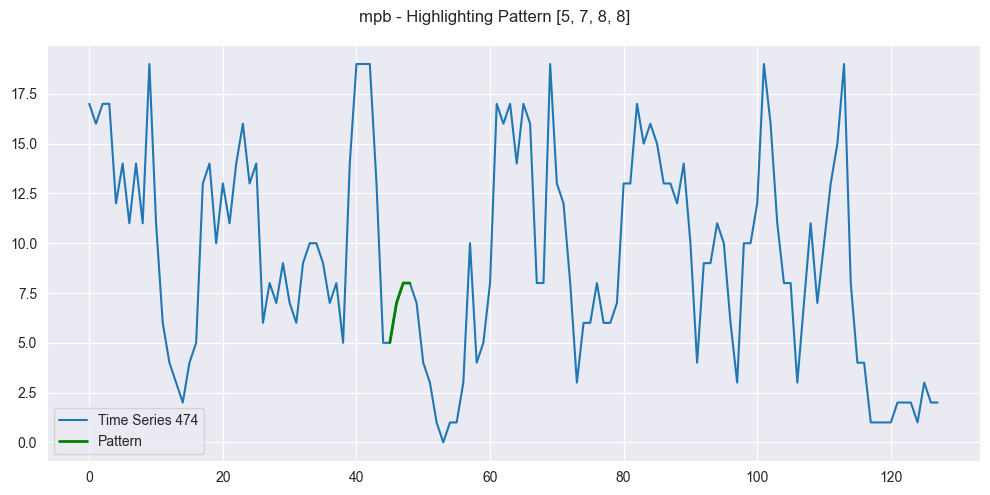

Processing genre: new-age
Most frequent longest pattern for new-age : (492, [9, 8, 6])


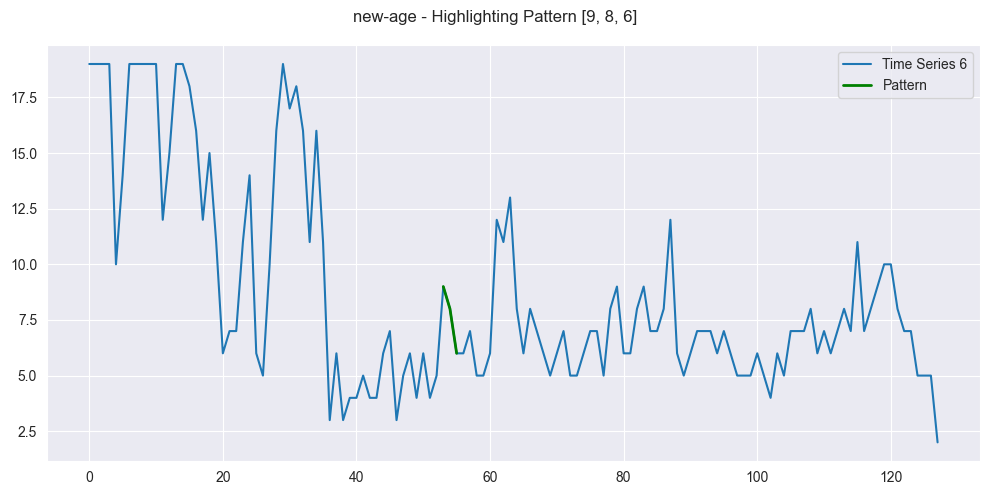

Processing genre: opera
Most frequent longest pattern for opera : (482, [8, 9, 9, 9])


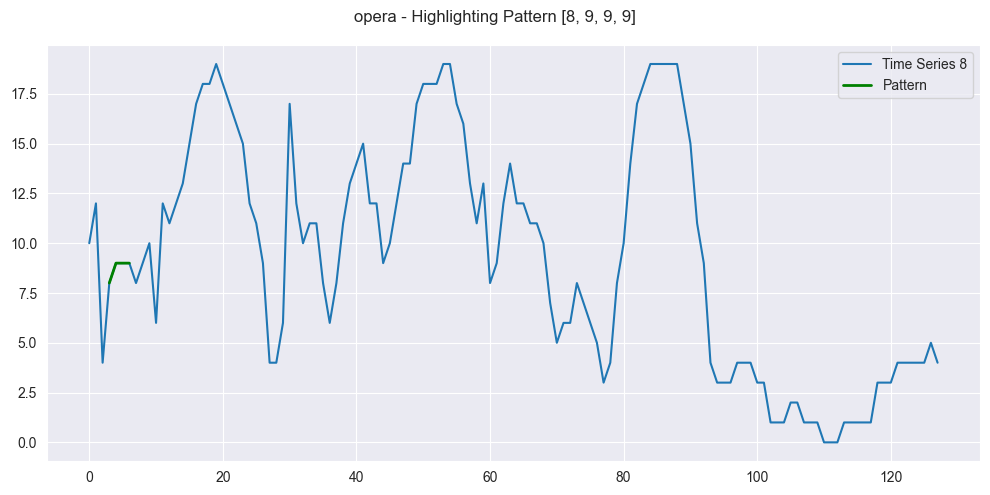

Processing genre: piano
Most frequent longest pattern for piano : (484, [9, 6, 7, 5])


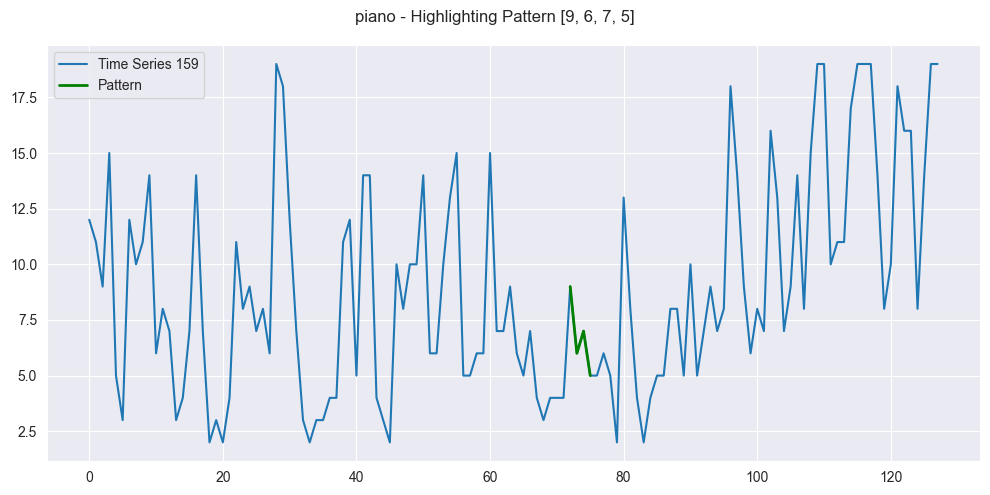

Processing genre: progressive-house
Most frequent longest pattern for progressive-house : (475, [11, 12, 12, 12])


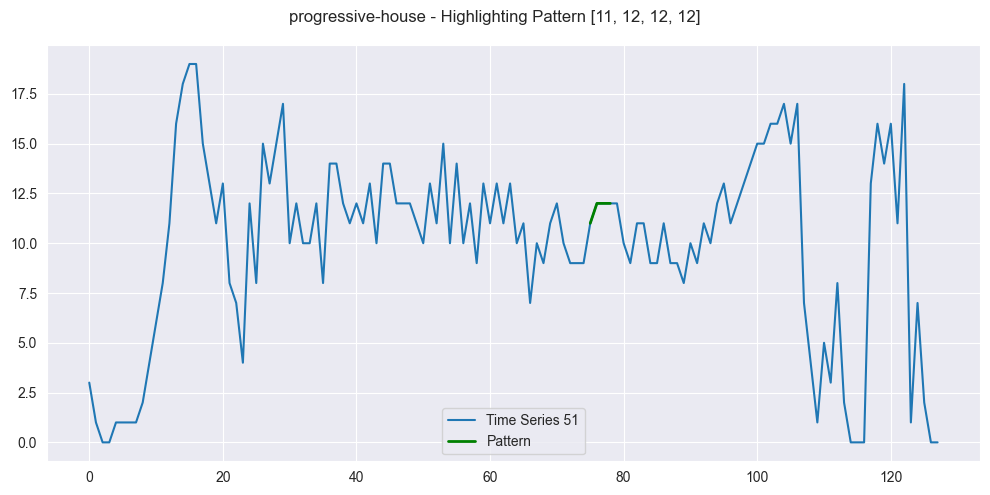

Processing genre: salsa
Most frequent longest pattern for salsa : (500, [8, 9, 9, 6])


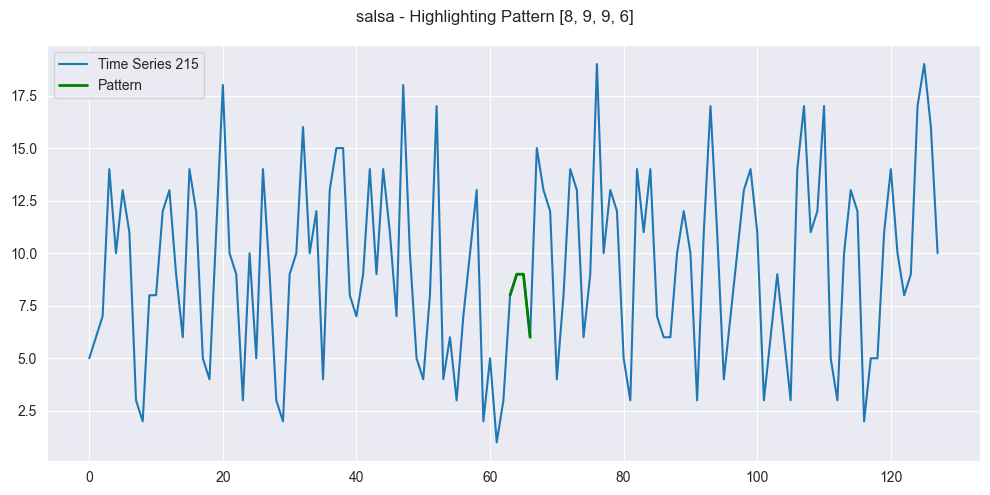

Processing genre: sertanejo
Most frequent longest pattern for sertanejo : (498, [9, 9, 10, 6, 9])
No occurrences of the pattern [9, 9, 10, 6, 9] found in any series for genre: sertanejo
Processing genre: sleep
Most frequent longest pattern for sleep : (491, [8, 10, 7])


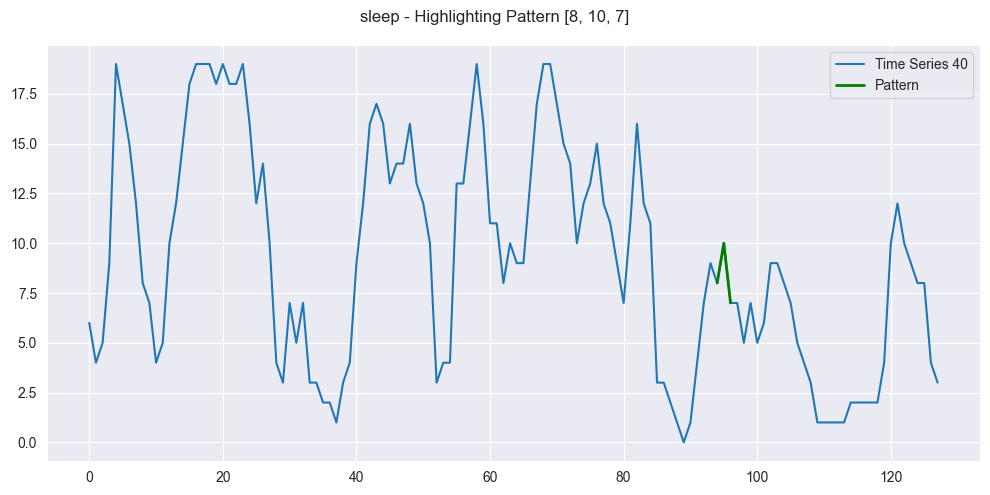

Processing genre: songwriter
Most frequent longest pattern for songwriter : (493, [7, 7, 7, 5])


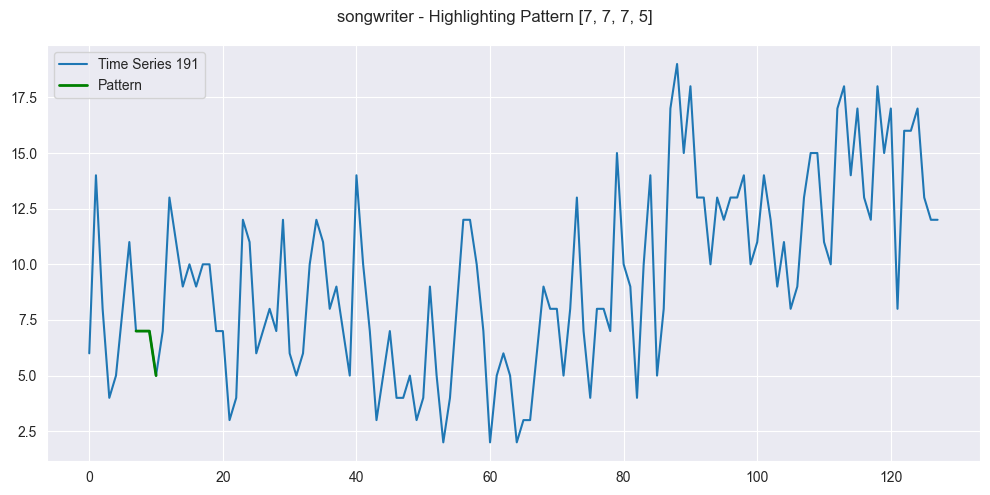

Processing genre: synth-pop
Most frequent longest pattern for synth-pop : (490, [7, 10, 10, 6])


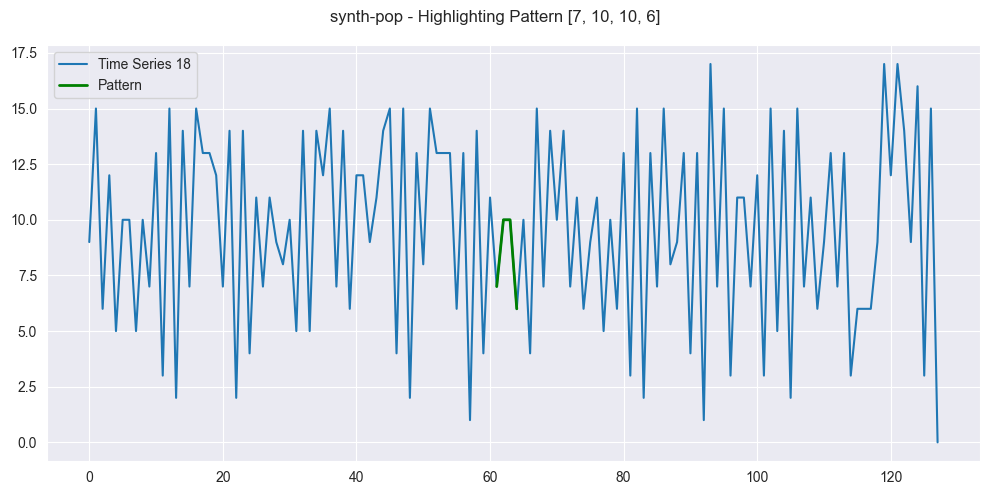

Processing genre: world-music
Most frequent longest pattern for world-music : (486, [11, 9, 9, 8])


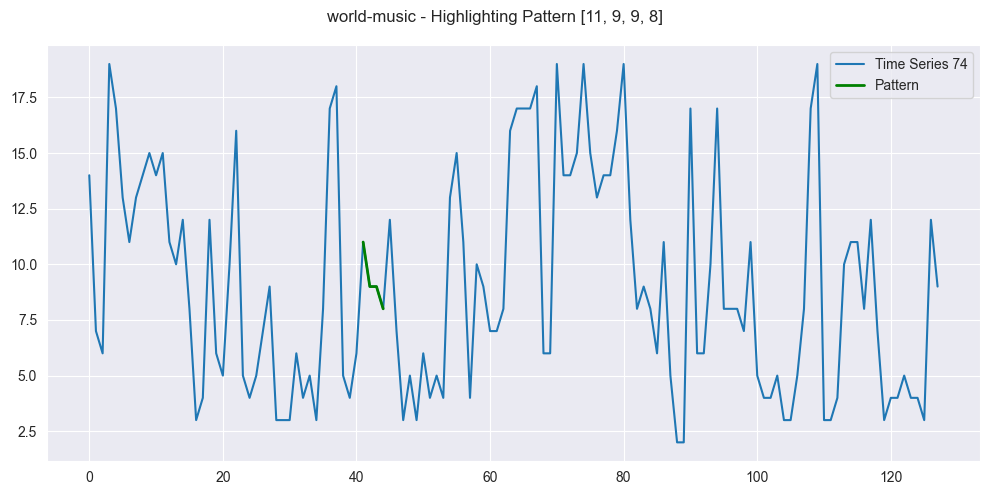

{'emo': [(495, [11, 9, 9, 11]),
  (494, [8, 9, 9, 11]),
  (494, [8, 10, 10, 10]),
  (494, [9, 8, 6, 5]),
  (494, [9, 8, 6, 6]),
  (494, [9, 8, 8, 6]),
  (494, [9, 8, 8, 11]),
  (494, [9, 8, 9, 6]),
  (494, [9, 8, 9, 9]),
  (494, [9, 8, 9, 11])],
 'folk': [(494, [7, 7, 8, 7]),
  (493, [7, 7, 7, 5]),
  (493, [7, 7, 7, 6]),
  (493, [7, 8, 9, 8]),
  (493, [7, 8, 10, 7]),
  (493, [7, 9, 9, 8]),
  (492, [7, 8, 9, 6]),
  (492, [8, 7, 8, 7]),
  (492, [12, 8, 7, 8]),
  (491, [6, 8, 7, 10])],
 'goth': [(496, [10, 10, 9, 9]),
  (494, [7, 9, 9, 9]),
  (494, [10, 8, 9, 9]),
  (493, [7, 10, 9, 9]),
  (493, [8, 9, 9, 6]),
  (493, [9, 10, 9, 9]),
  (493, [10, 9, 9, 9]),
  (492, [7, 6, 7, 7]),
  (492, [7, 10, 10, 9]),
  (492, [9, 9, 8, 9])],
 'happy': [(477, [9, 10, 10, 8]),
  (477, [9, 10, 10, 11]),
  (476, [9, 10, 9, 11]),
  (476, [9, 10, 10, 10]),
  (476, [9, 10, 10, 12]),
  (476, [9, 10, 11, 10]),
  (476, [10, 9, 10, 11]),
  (476, [10, 10, 11, 10]),
  (475, [9, 9, 10, 9]),
  (475, [9, 10, 12, 11])]

In [384]:
genres = ['emo', 'folk', 'goth', 'happy', 'heavy-metal', 'honky-tonk', 'j-idol', 'kids',
          'minimal-techno', 'mpb', 'new-age', 'opera', 'piano', 'progressive-house',
          'salsa', 'sertanejo', 'sleep', 'songwriter', 'synth-pop', 'world-music']

# Dictionary to store the most frequent longest patterns for each genre
genre_patterns = {}

# Iterating over each genre
for genre in genres:
    print(f"Processing genre: {genre}")

    # Apply SAX
    sax = SAX(word_size=128, alphabet_size=20)
    x_genre = X[y == genre]
    genre_transformed = sax.fit_transform(x_genre)

    # Transform genre_transformed to list of integers
    genre_transformed_int = []
    for i in range(genre_transformed.shape[0]):
        genre_transformed_int.append([int(element) for element in genre_transformed[i, -1].T])

    # Apply PrefixSpan to find top 500 patterns
    ps = PrefixSpan(genre_transformed_int)
    topk = ps.topk(500)

    # Find the most frequent longest pattern
    max_length = max(len(pattern[1]) for pattern in topk)
    longest_patterns = [pattern for pattern in topk if len(pattern[1]) == max_length]
    longest_patterns_sorted = sorted(longest_patterns, key=lambda x: x[0], reverse=True)

    # Save the top 10 most frequent longest patterns for the genre
    if longest_patterns_sorted:
        genre_patterns[genre] = longest_patterns_sorted[:10]
    else:
        genre_patterns[genre] = []
        print("No patterns found of maximum length for genre:", genre)

    # Print the most frequent longest pattern for each genre
    if longest_patterns_sorted:
        most_frequent_longest_pattern = longest_patterns_sorted[0]
        print("Most frequent longest pattern for", genre, ":", most_frequent_longest_pattern)
        pattern = most_frequent_longest_pattern[1]
        indices_per_series = {}
        for i in range(genre_transformed.shape[0]):
            series = genre_transformed[i, 0, :]  # Extract the series, remove extra dimensions
            indices = find_pattern_indices(series, pattern)
            if indices:
                indices_per_series[i] = indices
                if len(indices_per_series) == 1:  # Optionally limit to 3 series for visualization
                  break

    # Check if there are any series to plot
        if not indices_per_series:
            print(f"No occurrences of the pattern {pattern} found in any series for genre: {genre}")
            continue  # Skip to the next genre

        # Plotting
        fig, axs = plt.subplots(len(indices_per_series), 1, figsize=(10, 5 * len(indices_per_series)), squeeze=False)
        for ax, (ts_index, starts) in zip(axs.flatten(), indices_per_series.items()):
            series = genre_transformed[ts_index, 0, :]
            ax.plot(series, label=f'Time Series {ts_index}')
            for start in starts:
                ax.plot(range(start, start + len(pattern)), series[start:start + len(pattern)], color='green', linewidth=2, label='Pattern')
                ax.legend()

        plt.suptitle(f"{genre} - Highlighting Pattern {pattern}")
        plt.tight_layout()
        plt.show()
    else:
        print("No longest pattern found for", genre)

# Optionally, save or process genre_patterns further as needed
genre_patterns

## Now we iterate over each genre and plot

No occurrences of the pattern [7, 8, 7, 8, 9, 9, 6, 6] found in any series for genre: emo
No occurrences of the pattern [9, 9, 10, 6, 5, 4] found in any series for genre: folk
No occurrences of the pattern [8, 7, 6, 9, 8, 8, 8] found in any series for genre: goth


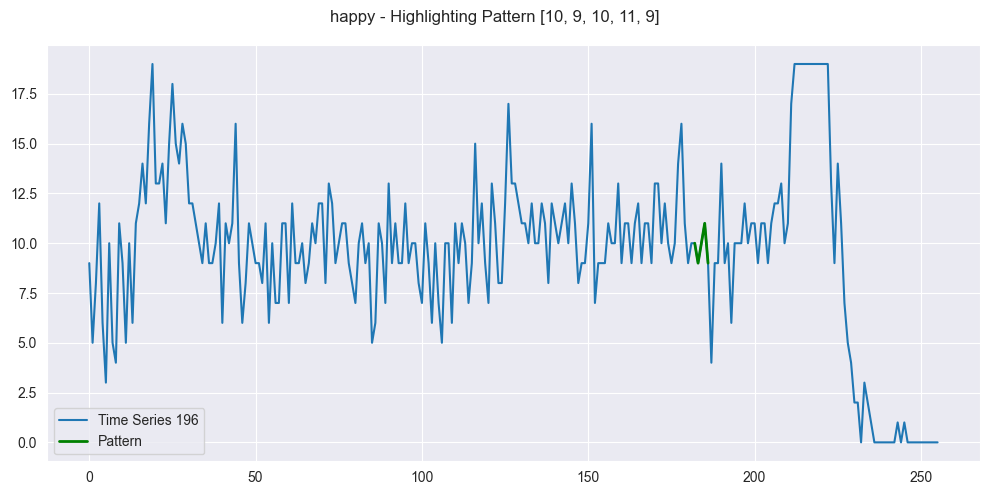

No occurrences of the pattern [9, 12, 10, 5, 7, 6, 6] found in any series for genre: heavy-metal
No occurrences of the pattern [4, 8, 6, 5, 6, 6, 5] found in any series for genre: honky-tonk
No occurrences of the pattern [13, 13, 8, 11, 12, 8, 12] found in any series for genre: j-idol
No occurrences of the pattern [7, 8, 6, 9, 7, 10, 3] found in any series for genre: kids


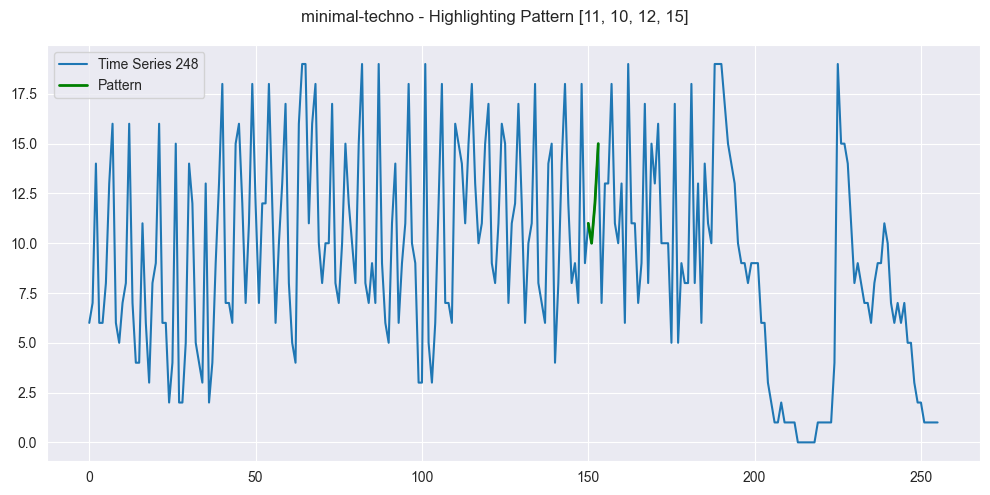

No occurrences of the pattern [11, 10, 8, 11, 8, 8, 10] found in any series for genre: mpb


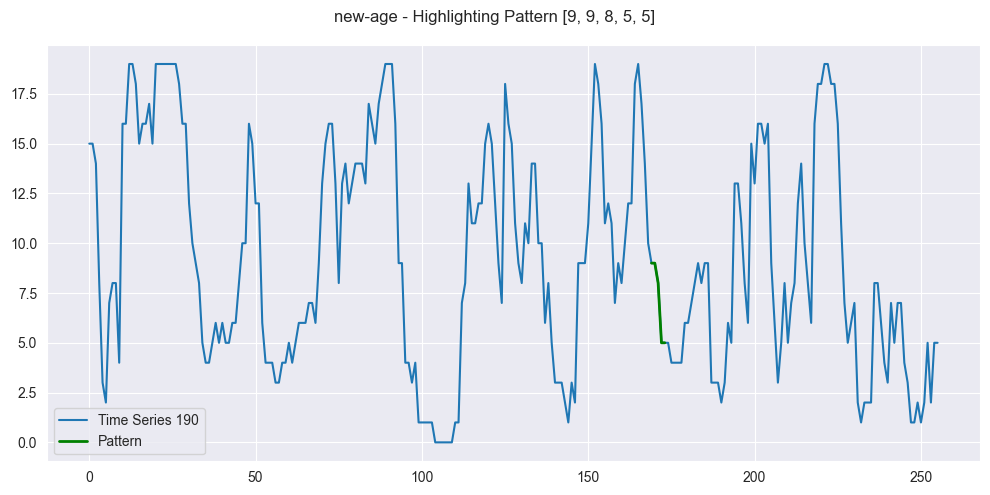

No occurrences of the pattern [9, 11, 11, 11, 9, 7] found in any series for genre: opera
No occurrences of the pattern [8, 12, 11, 6, 6, 5] found in any series for genre: piano


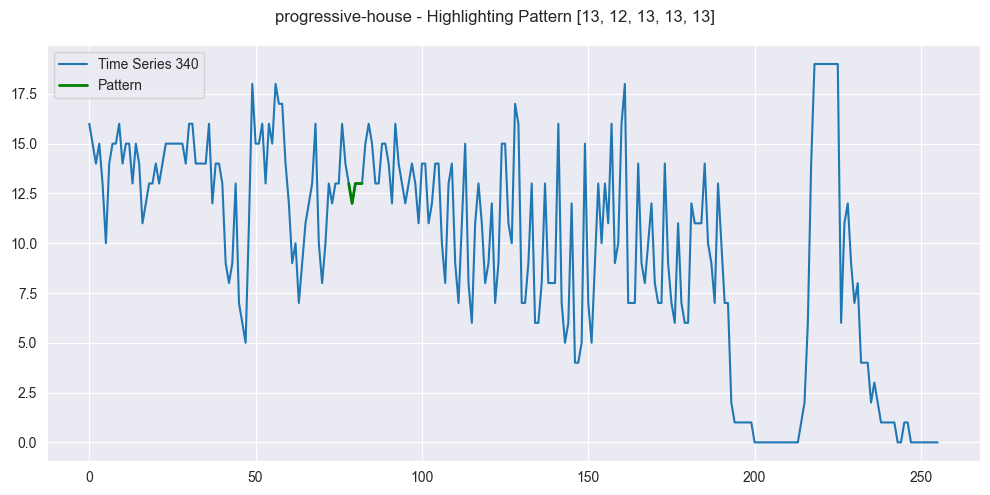

No occurrences of the pattern [5, 8, 13, 12, 7, 6, 9, 9, 6] found in any series for genre: salsa
No occurrences of the pattern [9, 12, 11, 7, 7, 9, 7, 8, 9] found in any series for genre: sertanejo
No occurrences of the pattern [6, 5, 6, 10, 11] found in any series for genre: sleep
No occurrences of the pattern [10, 8, 6, 8, 13, 10] found in any series for genre: songwriter
No occurrences of the pattern [9, 11, 7, 7, 10, 5, 5] found in any series for genre: synth-pop
No occurrences of the pattern [8, 9, 10, 8, 6, 5] found in any series for genre: world-music


In [369]:
for genre, patterns in genre_patterns.items():
    if not patterns:
        print(f"No patterns found for genre: {genre}")
        continue

    # Extract the most frequent longest pattern (first item in the sorted list)
    pattern = patterns[0][1]

    # Select the time series data for this genre
    x_genre = X[y == genre]

    # Apply SAX to the genre data if not already transformed
    sax = SAX(word_size=256, alphabet_size=20)
    genre_transformed = sax.fit_transform(x_genre)

    indices_per_series = {}
    for i in range(genre_transformed.shape[0]):
        series = genre_transformed[i, 0, :]  # Extract the series, remove extra dimensions
        indices = find_pattern_indices(series, pattern)
        if indices:
            indices_per_series[i] = indices
            if len(indices_per_series) == 1:  # Optionally limit to 3 series for visualization
                break

    # Check if there are any series to plot
    if not indices_per_series:
        print(f"No occurrences of the pattern {pattern} found in any series for genre: {genre}")
        continue  # Skip to the next genre

    # Plotting
    fig, axs = plt.subplots(len(indices_per_series), 1, figsize=(10, 5 * len(indices_per_series)), squeeze=False)
    for ax, (ts_index, starts) in zip(axs.flatten(), indices_per_series.items()):
        series = genre_transformed[ts_index, 0, :]
        ax.plot(series, label=f'Time Series {ts_index}')
        for start in starts:
            ax.plot(range(start, start + len(pattern)), series[start:start + len(pattern)], color='green', linewidth=2, label='Pattern')
            ax.legend()

    plt.suptitle(f"{genre} - Highlighting Pattern {pattern}")
    plt.tight_layout()
    plt.show()

Found occurrences in 0 series for genre: world-music
